# Moments and Correlation

## You must master the definitions of the following terms
(We will review these cocnepts in class.  The following references go beyond what will be covered and include much useful inforamtion. )
1. [moments](https://en.wikipedia.org/wiki/Moment_(mathematics))
1. [correlation](https://en.wikipedia.org/wiki/Correlation)


In [1]:
## import useful libraries
import numpy as np
import matplotlib.pyplot as plt



# Moments

In the last example from the previous notebook (Statistical Distribtions) we saw that the chi-squared distribtion does not have the same shape as the gaussian PDF.   We would like a tool to quantify these differences.  Moments give us jsut such a tool.  These can be used to summarize (compress) the information contained in a PDF.  The mean and variance are the most famous examples.  The genral equaiton for moments is:

#### 

\begin{equation}
\langle x^n \rangle  = \rm{E(x^n)} = \displaystyle\int_{-\infty}^{\infty} x^n \phi(x) dx
\label{eq:moments} \tag{4}
\end{equation}

where $\langle x^n \rangle  = \rm{E(x^n)}$ is defined as the expectation value. n = 1,2,3 are the first, second, third, etc moments.  The probability density fuciton $\phi$ is assumed to be normalized such that $\int \phi dx = 1$.

The first moment is just the (PDF) weighted mean. 

<i> Centered moments </i> are higher moments shifted to this mean: $\mu^n = \langle (x - \langle x \rangle )^n \rangle$

An important centered moment is for n = 2: $\mu^2 = \langle (x - \langle x \rangle )^2 \rangle$. This is the <i>variance</i>, which is the square of the spread about the mean. One can easily show that:

$$\mu^2 = E(x^2) - (E(x))^2$$

## Example

One can use the above techniques to calculate the variance about the mean of the <i>Poisson Distribution</i> and find:

$$\mu^2 = \sigma^2 = \sqrt{\lambda}$$

where we have switched to the more common variance label, $\sigma^2$. It is usefull to remmeber that the variance of a Poisson distribution is the square-root of the mean.  If you have evidence that your data were generated through a Poisson process (or you measure a Poisson process), you will often see means and errors quoted as $m \pm{\sqrt{m}}$ (e.g. photon counting with $m$ counts). 

Verify this numerically. I have given you a realizaiton of the poisson distirbtion below.  Vary the lambda paramter and possibly the number of samples and check that the variance and mean are consistant with this formula.


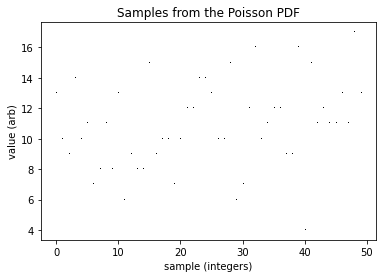

In [11]:
## generate a realization of N samples following a gaussian distribtion with zero mean and unit variance
N = 50
data = np.random.poisson(10,N)   ###<<<<<<<<<<<<<<<< modify this line

## plot this realization 
plt.plot(data,",k")
plt.title("Samples from the Poisson PDF")
plt.xlabel("sample (integers)")
plt.ylabel("value (arb)")


plt.show()

## compute the mean and standard deviation and print them out





## Higher moments
The third moment, called the skewness, $⟨x^3⟩$, characterizes the simplest asymmetry, while the fourth moment, the kurtosis, $⟨x^4⟩$, characterizes the flatness of the distribution.

### calculating moments from samples of a distribtion

If you are working form a set of samples of a distribution $x_i$ for $i = 1... N$ then the moments are calculated as $$<x> = \frac 1 N \Sigma_{i=1}^N x_i, $$ and for centered moments with $n>1$ $$ E(\mu^n) = \frac 1 {N-1} \Sigma_{i=1}^N (x_i-<x>)^n .$$

### variance vs variance on the mean

The second moment is the sample varaince which gives us an estimate of the width of the population from which individual samples are drawn from.   Often times we are interested in a related question which is this: if we calucate the mean using $N$ samples from this polulation, what is the variance on this measurement of the mean?  In other words, if we were to repeat the measuremnt of the mean multiple times, what would the standard deviation of the measurments of the mean be?   The variance on the mean can be calulated as $\sigma_{mean}= \frac {\sigma_{sample}}{\sqrt{N-1}} $ where $N$ is the number of samples.  The factor $N-1$ acounts for the fact that the average is removed reducing the number of degrees of freedom.   We will use this below when plotting error bars.



### Excercise
Generate a realization of the Poisson distribtion with 10000 saples and lamda = 10.  Compute the mean, standard deviation, [skewness](https://en.wikipedia.org/wiki/Skewness), and [kertossis](https://en.wikipedia.org/wiki/Kurtosis).  

In [157]:
## your code goes in this box

discussion goes here

## Multiple random processes

Often multiple random porcesses, perhaps obeying seperate statistical distribtions will contribute to the description of the data.  A question that comes up a lot is: "what happens to the momnents" in cases where multiple sources of errors are present.  The following math proves the rule that for statistically indpendant quantities, the moments of the sum is the sum of the moments.

\begin{align*} 
		E(X+Y) &= \sum_{x} \sum_{y} (x+y) p(x, y)\\ 
		&= \sum_{x} \sum_{y}\left(x p(x, y) + y p(x, y)\right)\\ 
		&= \sum_{x} \sum_{y} x p(x, y) + \sum_{x} \sum_{y} y p(x, y)\\ 
		&= \sum_x x \sum_y p(x,y) + \sum_y y \sum_x p(x,y)\\ 
		&= \sum x p_X(x) + \sum_y y p_Y(y)\\ 
		&= E(X) + E(Y) 
\end{align*}


For example if X and Y are gaussians with unit varaince and we compute the variance of the sum we would get $\sigma^2 = 2$.  Since the RMS = $\sqrt{\sigma^2}$ this shows the rule that ading equal errors increases the error by $\sqrt{2}$.

### Excercise: 

Imagine a detector with an intrinsic noise described by a gaussian of mean zero and unit variance.  Call this distribtion $x_1$   If this detector is pointed at the sky, atmospheric emission could contribute a statisticaly indepndant signal described by poisson statisstics.  Call this signal $x_2$ and assume $\lambda = 0.2$.  

Compute the mean and the variance for these distribtins individually and for the sum.  Confirm that the moments of the sum is the sum of the moments for these two cases. 

In [158]:
## your code goes in this box

## Correlation and Covariance

#### 
Consider 4 coins and 5 flips each and we record the results:

Coin 𝐴:+,−,−,+,−

Coin 𝐵:−,−,−,−,+

Coin 𝐶:+,−,+,+,−

Coin 𝐷:−,+,−,−,+

Which coins are correlated and by how much?

##### 
We define a function that is positive when the two results are similar, and negative when they are dissimilar. The easiest function is multiplication: it will be positive when the coins have the same result (++ or --) and negative when they differ (+- and -+). 

We can multiply each trial, $\it{then\ average\ the\ results}$ to get an overall estimate of how similar the results are.

$\begin{align}
C_{AB} &= \frac{-1+1+1-1-1}{5} = 0.2 \tag{5}\\
C_{AC} &= \frac{+1+1-1+1+1}{5} = 0.6 \tag{6}\\
C_{AD} &= \frac{-1-1+1-1-1}{5} = -0.6 \tag{7} \\
\end{align}$

So 𝐴 and 𝐵 seem pretty uncorrelated, 𝐴 and 𝐶 may be correlated, and 𝐴 and 𝐷 are anti-correlated.

### Formal Definitions

For bivariate distributions (of two random variables), consider the probaility distribution $\phi(x,y)$ where the random variables $X$ and $Y$ are <i>NOT</i> independent, one can also define a covariance (assuming $⟨x⟩ = ⟨y⟩ = 0$):

$$Cov(x,y) = \langle xy \rangle = \int_{-\infty}^{\infty} xy\ \phi(xy)\ dxdy = E\big[(xy)\big] \tag{8}$$

This leads to a formal definition of the correlation coefficient:

$$r = \frac{Cov(x,y)}{Var(x)Var(y)} \tag{9}$$

where $Var$ is the variance as defined above. 

with more than two variables are present we often subscript $r$ as $r_{ij}$ where $i$ and $j$ specify the two channels being considered.  The collection of all possible $r_{ij}$ elements represtns the covaraince (or correleation) matrix.

### Equivelent Definitions
Sometimes, you will see an equivalent definiton using vectors (for centered data):

$$r = cos\theta = \frac{\vec{a} \cdot \vec{b}}{|a||b|}$$

If the data are not centered, then we have:
$$Cov(x,y) = E\big[(x-\mu_x)(y-\mu_y)\big]$$

and

$$r = \frac{E\big[(x-\mu_x)(y-\mu_y)\big]}{\sqrt{\mu^2_x\mu^2_y}}$$

which is nominally known as the <i> Pearson correlation coefficient </i>.

In practice for a sample of $x,y$ pairs, we write:

$$r = \frac{\sum_{i=1}^{N}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{N}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{N}(y_i - \bar{y})^2}} \tag{10}$$

Covariance can range from -$\infty$ to +$\infty$. But Correlation ranges from -1 to +1. Unlike the correlation, the magnitude of the covariance does not mean anything since it is dependent upon the magnitude of the constituent of the series. However in both cases, the sign DOES matter. 

To be super clear, <i>correlation is the covariance</i>, but normalized to the sample variances. Because it is normalized, the value of the correlation becomes a meaningful quantity to compare to other correlations.

There is a fun article which presents 13 different (!) interpretations of correlation [here](https://www.stat.berkeley.edu/~rabbee/correlation.pdf).

### Excercise

Consider the three timesreams given below $x$, $y$, and $z$.  I have given you the computation of a covariance and a correlation between one set of channel pairs as a starting point.    

1. How may difference correlations and covariance are there to compute? 
1. Compute the covariance, and the correlation between all sets of channels.  

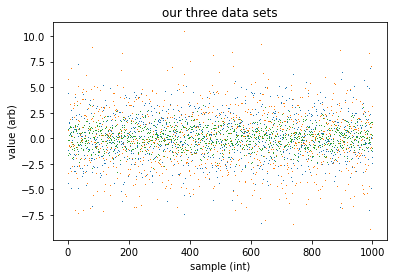

covariance xz:  159.42405837102893 correlation_xz 0.06784830447184023


In [19]:
A = np.random.randn(1000)
B = np.random.randn(1000)
C = np.random.randn(1000)

x = A +2*B
y = -2*A - 2*B -0.5*C
z=  C


plt.plot(x,",")
plt.plot(y,",")
plt.plot(z,",")
plt.title("our three data sets")
plt.ylabel("value (arb)")
plt.xlabel("sample (int)")
plt.show()

## compute your answeres here.

cov_xz = np.sum(x*z)
cor_xz = np.sum(x*z) / np.sqrt(np.sum(x*x)*np.sum(z*z))
print("covariance xz: ",cov_xz, "correlation_xz", cor_xz)

## Excerecise 

In the previous excercise you shold have figured out that three are 9 correlation coefficeincs.   Fill in the followign tables for the covariance and correlaiton matrixes.  We will use thsese structures often in multivariate statistics.

|  \    | $\sigma_x$ | $\sigma_y$ | $\sigma_z$ | 
| --- | --- | --- | --- |
|$\sigma_x$ | X | X | X |
|$\sigma_y$ | X | X | X |
|$\sigma_z$ | X | X | X |
